# Insper Jr. 

# Análise de Dados para R. Amaral Office
___


In [2]:
import pandas as pd
import os
import math
from statsmodels.tsa.seasonal import STL

%matplotlib inline
import matplotlib.pyplot as plt

## LEITURA DA BASE DE DADOS

In [3]:
## print("Esperamos trabalhar no diretório")
print(os.getcwd())

/Users/liviacarvalho/Documents/Insper Junior/Trainee /Analise de dados/Analise-de-Dados-Jr.---Livia-e-Joao/analises


In [4]:
filename = 'Base de Dados R. Amaral Office.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')

Parece que o arquivo Base de Dados R. Amaral Office.xlsx está na mesma pasta do notebook da avaliação, yay!



In [5]:
# Carregando os dados
df = pd.read_excel(filename)
df.head()

,id_pedido,nome_cliente,modo_envio,estado,vendas,quantidade,desconto,lucro,segmento,região,...,dia_pedido,dia_semana_pedido,mes_pedido,ano_pedido,dia_envio,mes_envio,ano_envio,data_pedido,mes_ano,tempo_preparacao
0,1,Muhammed MacIntyre,Expresso,Paraná,825.174,9,0.30,-117.8820,Corporativo,Sul,...,4,Domingo,9,2016,6,9,2016,42617,42617,2
1,2,Ruben Dartt,Normal,São Paulo,411.332,4,0.15,-4.8392,Consumidor,Sudeste,...,5,Sexta-feira,9,2014,9,9,2014,41887,41887,4
2,3,Liz Pelletier,Mesmo Dia,São Paulo,411.332,4,0.15,-4.8392,Home Office,Sudeste,...,28,Quinta-feira,11,2013,28,11,2013,41606,41606,0
3,4,Liz Pelletier,Expresso,Amapá,241.960,2,0.00,33.8744,Consumidor,Norte,...,30,Segunda-feira,5,2016,31,5,2016,42520,42520,1
4,5,Liz Pelletier,Normal,Sergipe,341.960,2,0.00,78.6508,Home Office,Nordeste,...,31,Terça-feira,12,2013,7,1,2014,41639,41639,7


## PREPARO DA BASE DE DADOS

In [6]:
type(df)
df.dtypes

id_pedido              int64
nome_cliente          object
modo_envio            object
estado                object
vendas               float64
quantidade             int64
desconto             float64
lucro                float64
segmento              object
região                object
subcategoria          object
categoria             object
dia_pedido             int64
dia_semana_pedido     object
mes_pedido             int64
ano_pedido             int64
dia_envio              int64
mes_envio              int64
ano_envio              int64
data_pedido            int64
mes_ano                int64
tempo_preparacao       int64
dtype: object

## 6. Análise Geográfica

In [7]:

# 1.1 Agregação por região
agg_regiao = (
    df
    .groupby('região')
    .agg(
        vendas_total   = ('vendas', 'sum'),
        lucro_total    = ('lucro', 'sum'),
        pedidos        = ('id_pedido', 'nunique'),
        quantidade_tot = ('quantidade', 'sum')
    )
    .sort_values('vendas_total', ascending=False)
    .reset_index()
)

# Exibir a tabela resumida
print(agg_regiao)


         região  vendas_total  lucro_total  pedidos  quantidade_tot
0       Sudeste  1.027853e+06  135122.0913     4564           17346
1      Nordeste  5.440173e+05   79807.6318     2200            8391
2         Norte  2.920997e+05   70928.0076     1156            4351
3           Sul  2.841677e+05   -1158.1262     1387            5163
4  Centro-Oeste  1.490632e+05    1697.4172      687            2622


In [8]:
# 2.1 Agregação por estado
agg_estado = (
    df
    .groupby('estado')
    .agg(
        vendas_total = ('vendas', 'sum'),
        lucro_total  = ('lucro', 'sum'),
        pedidos      = ('id_pedido', 'nunique')
    )
    .sort_values('vendas_total', ascending=False)
    .reset_index()
)

print(agg_estado.head(10))  # Top 10 estados por vendas


              estado  vendas_total  lucro_total  pedidos
0          São Paulo   471071.9885   79892.8789     2083
1     Rio de Janeiro   310876.2710   74038.5486     1128
2       Minas Gerais   170188.0458  -25729.3563      985
3           Amazonas   138641.2700   33402.6517      506
4  Rio Grande do Sul   116511.9140  -15559.9603      587
5              Bahia   101151.8380     609.3854      443
6             Paraná    91386.1570  -10061.3535      545
7           Maranhão    81408.0600   21770.9266      277
8         Pernambuco    78258.1360  -16971.3766      469
9     Santa Catarina    76269.6140   24463.1876      255


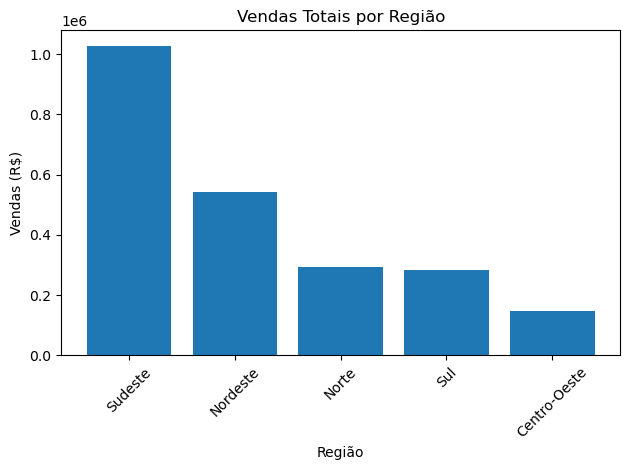

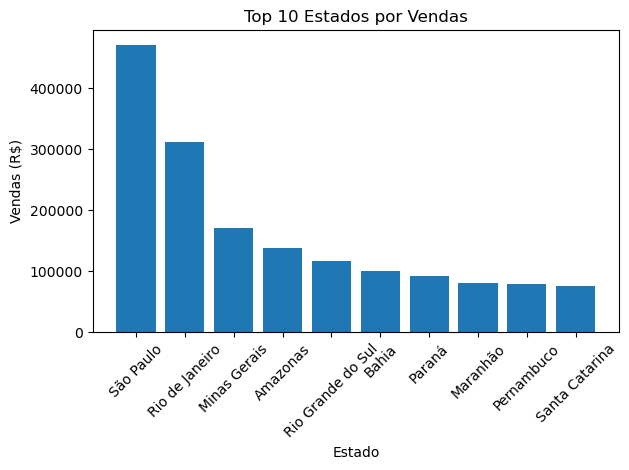

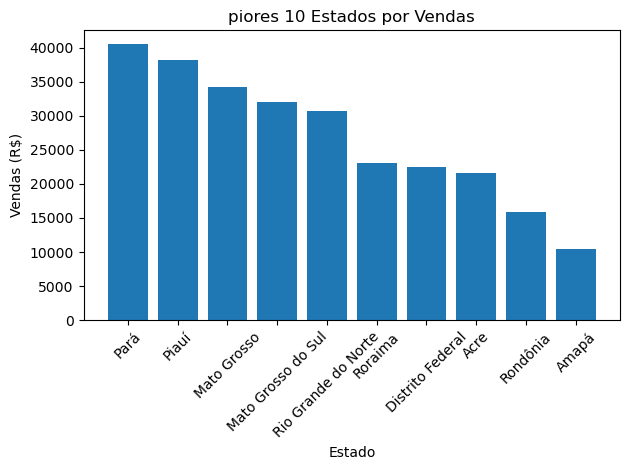

In [9]:
import matplotlib.pyplot as plt

# 3.1 Vendas por região
plt.figure()
plt.bar(agg_regiao['região'], agg_regiao['vendas_total'])
plt.title('Vendas Totais por Região')
plt.xlabel('Região')
plt.ylabel('Vendas (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.2 Vendas por estado (top 10)
top10 = agg_estado.head(10)
plt.figure()
plt.bar(top10['estado'], top10['vendas_total'])
plt.title('Top 10 Estados por Vendas')
plt.xlabel('Estado')
plt.ylabel('Vendas (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.2 Vendas por estado (top 10)
piores10 = agg_estado.tail(10)
plt.figure()
plt.bar(piores10['estado'], piores10['vendas_total'])
plt.title('piores 10 Estados por Vendas')
plt.xlabel('Estado')
plt.ylabel('Vendas (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# 1) Calcular margem de lucro
agg_regiao['margem_lucro'] = agg_regiao['lucro_total'] / agg_regiao['vendas_total']

# 2) Exibir a tabela com margem
print(agg_regiao[['região', 'vendas_total', 'lucro_total', 'margem_lucro']])


         região  vendas_total  lucro_total  margem_lucro
0       Sudeste  1.027853e+06  135122.0913      0.131461
1      Nordeste  5.440173e+05   79807.6318      0.146701
2         Norte  2.920997e+05   70928.0076      0.242821
3           Sul  2.841677e+05   -1158.1262     -0.004076
4  Centro-Oeste  1.490632e+05    1697.4172      0.011387


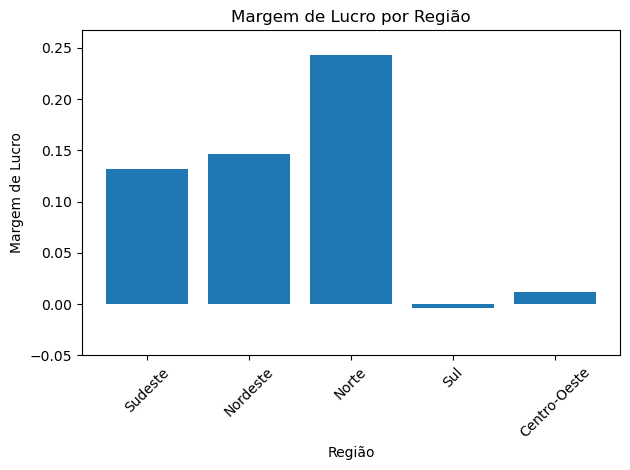

In [13]:
plt.figure()
plt.bar(agg_regiao['região'], agg_regiao['margem_lucro'])
plt.title('Margem de Lucro por Região')
plt.xlabel('Região')
plt.ylabel('Margem de Lucro')
plt.ylim(-0.05, agg_regiao['margem_lucro'].max() * 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- O Sudeste lidera em volume, mas não é o mais rentável proporcionalmente (ver margem abaixo)
- O Norte apresenta a maior margem (24 %), embora seja só o 3º em receita; Sul está no limite de rentabilidade, com prejuízo líquido. Centro-Oeste quase não gera lucro, apesar de faturar R$ 150 mil; --> focar no crescimento do Norte e do Nordeste (alta rentabilidade), enquanto no Sul e no Centro-Oeste é preciso revisar preços, custos logísticos ou políticas de desconto
- O Sul tem o menor ticket médio e ainda prejuízo – sinal de mix de produto de baixo valor ou altos custos extras. --> elevar o ticket médio no Sul (cross-selling, upsell) ou reduzir custos específicos dessa região.
- Os estados da região Norte (AM, MA) mostram eficiência operacional ou mix premium; já em MG, RS e PR é urgente investigar descontos excessivos, custos de frete ou retorno de mercadorias
- Recomendações
    - Reforçar presença onde há alta margem: Norte e Nordeste podem receber campanhas de marketing e expansão de estoque
    - Revisar política no Sul e Centro-Oeste:
        - Negociar fretes, rever contratos de logística.
        - Avaliar mix de produtos e níveis de desconto.
    - Investigar casos isolados: Minas Gerais, Paraná e Rio Grande do Sul demandam análise de custo x receita por produto.
    - Aprimorar ticket médio no Sul: ofertas de kits ou bundles podem elevar o valor médio por pedido.

Conclusão:
Apesar do Sudeste ser o maior mercado em faturamento, o Norte é o mais lucrativo proporcionalmente. Ajustes de custo e preço nas regiões Sul e Centro-Oeste são críticos para levar todo o território a patamares saudáveis de rentabilidade.

- Priorizar Expansão e Investimento onde a Rentabilidade é Mais Alta
- Revisar Modelo de Custos e Preços em Regiões de Baixa Rentabilidade
- Elevar o Ticket Médio nas Regiões com Menor Valor por Pedido
- Focar em Estados-Chave com Potencial de Crescimento
- Ajustar Mix de Produtos e Segmentação
- Oportunidades de Marketing e Parcerias Regionais

Insights Estratégicos para Apoiar Decisões da Empresa
Priorizar Expansão e Investimento onde a Rentabilidade é Mais Alta
Região Norte (margem ≈ 24 %): apesar de representar apenas ~12 % do faturamento, é o mercado mais rentável.
Ações sugeridas: ampliar mix de produtos, reforçar estoque local e intensificar campanhas de marketing digital regionais.
Região Nordeste (margem ≈ 15 %): segundo maior mercado em receita e rentabilidade sólida.
Ações sugeridas: parcerias com influenciadores locais, promoções pontuais em datas comemorativas (festas juninas, Carnaval).
Revisar Modelo de Custos e Preços em Regiões de Baixa Rentabilidade
Sul (margem negativa): prejuízo operacional indica custos logísticos elevados ou descontos excessivos.
Ações sugeridas: renegociar contratos de frete, implementar frete compartilhado, revisar políticas de devolução e reembalagem.
Centro-Oeste (margem ≈ 1 %): baixa lucratividade, mesmo com faturamento relevante.
Ações sugeridas: otimizar rotas de entrega, estudar hubs de distribuição regionais e ajustar preços mínimos de venda.
Elevar o Ticket Médio nas Regiões com Menor Valor por Pedido
Norte e Nordeste já têm ticket médio mais alto (~R$ 250), mas Sul e Centro-Oeste (≈ R$ 205–217) podem aumentar valor via:
Bundles e Kits (combos de produtos complementares).
Cross-sell / Upsell no checkout (sugestões de produtos afins).
Programas de Fidelidade com pequenas recompensas por valor de compra.
Focar em Estados-Chave com Potencial de Crescimento
Amazonas e Maranhão: margens elevadas (> 24 %) sugerem mix de produtos premium bem aceito. Expandir sortimento e parcerias locais.
Minas Gerais e Rio Grande do Sul: faturamento alto, mas margens negativas. Tomar ações rápidas de diagnóstico de mix, nível de desconto e custos de devolução.
Ajustar Mix de Produtos e Segmentação
Investir em produtos de alta margem nas regiões Norte/Nordeste (ex.: linhas exclusivas ou edições limitadas).
Reduzir SKUs de baixa rotatividade/baixa rentabilidade no Sul e Centro-Oeste para cortar estoque parado e custos de manutenção.
Oportunidades de Marketing e Parcerias Regionais
Eventos Locais (feiras, exposições, festivais culturais) no Norte/Nordeste: gerar visibilidade e reforçar marca.
Parcerias com Revendas/Franquiados para ampliar capilaridade, especialmente em mercados emergentes do Centro-Oeste.
Monitoramento Contínuo e Testes A/B
Implantar dashboards com indicadores por estado/região: vendas, lucro, ticket médio e custos logísticos.
Testar variações de preço e frete em amostras regionais antes de rollout nacional.